# Introduction to Computer Vision
<center>
    <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png />
</center>


**OBJECTIVES**

- Build Edge Detector from scratch
- Understand and implement Convolutional operations with filter
- Understand and implement Max Pooling 
- Use `keras` to implement a Convolutional Neural Network



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#mnist exists in scikit learn - they're images. come to us as squares
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Building a Classic Neural Net for Images

In [26]:
# data from mnist comes through in tuples like this
(x_train, y_train), (x_test, y_test) = mnist.load_data()

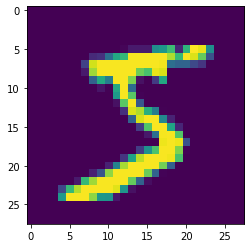

In [4]:
# this comes as a square
# before we feed into a neural net, we need to flatten this out with keras. 
plt.imshow(x_train[0])


# we're tyring to categorize if this image is a number 

In [27]:
x_train[0].shape

(28, 28)

In [28]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
# digit_model1 = Sequential()
# # need to flatten the images - expects a stack of 3d things that will be made into a 2d stack
# digit_model1.add(Flatten())
# # add a hidden layer with 100 nodes and relu activation
# digit_model1.add(Dense(100, activation= 'relu'))
# # this will be the output. there will be 10 unique categories, so we need 10 nodes
# # we will need softmas activation
# digit_model1.add(Dense(10, activation= 'softmax'))

# 


digit_model1 = Sequential() #template for network
digit_model1.add(Flatten())
digit_model1.add(Dense(100, activation = 'relu')) #hidden layer with 100 nodes
digit_model1.add(Dense(10, activation = 'softmax'))

In [37]:
# compile
# categorical_crossentropy bc it's multiclass
# accuracy because it's classification

digit_model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy']) #loss for multi-class metric for classification

In [39]:
### DATA PREP

# scale x 
# grayscale as a color rep is a number between 0 and 255- max number you can get from 8 bits of info which is how colors are stored
x_train = x_train/255
x_test = x_test/255

# one hot encode y 
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)



In [40]:
digit_model1.fit(x_train, y_train_ohe,
                validation_data=(x_test, y_test_ohe)
                , epochs= 20), 

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy:

(<keras.callbacks.History at 0x7fdd9eb7ee80>,)

In [ ]:
# #use with scikitlearn
# def networker(layer_1_units = 22, layer_1_activation = 'relu'):
#     model = Sequential()
#     model.add(Flatten())
#     model.add(Dense(layer_1_units, activation = layer_1_activation))
#     model.add(Dense(10, activation = 'softmax'))

#     model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
#     return model

# #Make the Classifier
# kclass = KerasClassifier(build_fn=networker)

# kclass.fit(train_images, train_labels)

# from sklearn.pipeline import make_pipeline

# from sklearn.model_selection import GridSearchCV

# params = {'layer_1_units': [10, 20, 100],
#          'layer_1_activation': ['relu', 'tanh']}

# grid = GridSearchCV(kclass, param_grid=params)

# grid.fit(train_images, train_labels)

# grid.best_params_

# grid.best_score_

### Some Basic Image Work

In [41]:
#create 5 by 5 image
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)

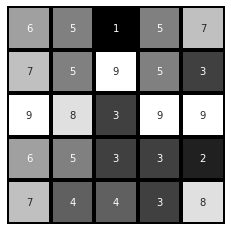

In [42]:
#visualize
sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black')
plt.xticks([])
plt.yticks([]);

In [43]:
# three by three filter
# this is called a convolution- taking a filter and using it to 
# pass over and image and do the convulition
# it's matrix multip= multiple and add
# we do this to every 3x3 grid and keep moving across until the whole image has been covered by
# the filter- sort of like scanning across an image with a 3x3 grid
f = np.zeros((3, 3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [44]:
f[:, 0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

<AxesSubplot:>

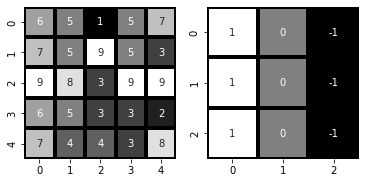

In [45]:
#side by side images
fig, ax = plt.subplots(1, 2)

sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[0])


sns.heatmap(f, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[1])


In [46]:
#select upper left corner of image
im[:3, :3]

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [47]:
#convolve
np.sum(im[:3, :3]*f)

9.0

In [48]:
#What is this doing?
output = np.zeros((3, 3))
for row in range(3):
    for col in range(3):
        output[row, col] = np.sum(f*im[row: row + 3, col: col + 3])

In [49]:
#examine output
# this is smaller than the input- will always lose like the top and bottom 
output

array([[ 9., -1., -6.],
       [ 7.,  1.,  1.],
       [12.,  2., -9.]])

### Detecting Edges

In [50]:
#10 by 10 grid
im2 = np.zeros((10, 10))
im2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
#make first half 10
im2[:, :5] = 10

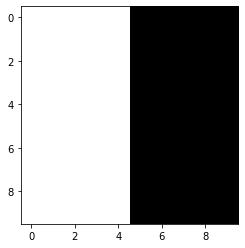

In [53]:
#take a look
plt.imshow(im2, cmap = 'gray')

In [54]:
#convolutions
output = np.zeros((8, 8))
for row in range(8):
    for col in range(8):
        output[row, col] = np.sum(f * im2[row: row + 3, col: col + 3])

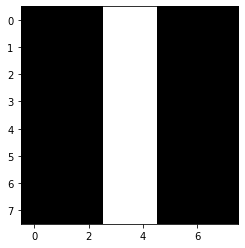

In [55]:
#take a look at result
plt.imshow(output, cmap = 'gray')

### Edges in X-Rays

**GOAL**: Formalize work from above in a class with a vertical and horizontal edge detector.  Your class should have a `.fit()` method that takes in an image and passes the edge detectors over it once, and a `.show` image that plots the image, vertical edges, and horizontal edges in a 1 x 3 grid.

In [56]:
chest = plt.imread('images/person10_bacteria_43.jpeg')

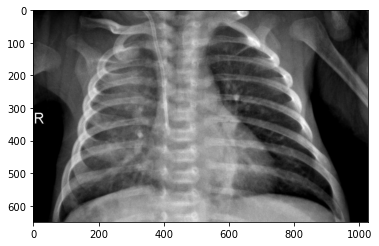

In [57]:
plt.imshow(chest, cmap = 'gray')

In [58]:
rows = chest.shape[0] - 2
cols = chest.shape[1] - 2

output = np.zeros((rows, cols))
for row in range(rows):
    for col in range(cols):
        output[row, col] = np.sum(f * chest[row: row + 3, col: col + 3])

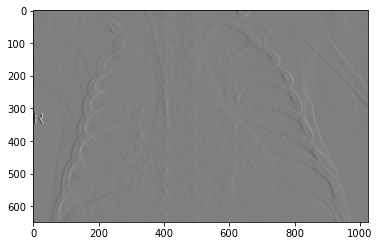

In [59]:
plt.imshow(output, cmap = 'gray')

### Max Pooling

<center>
<img src = https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png />
</center>

- Selects maximum value from 2 x 2 square.  In the image above, we have a *stride* of 2.

- Operation will follow convolution

In [ ]:
# with a neural net, this will iteratively pass a grid over an image
# and figure out the best weights
# then pass over the image
# then get wieghts
# etc etc
# until it figures things out
# you will also try this with multiple filters


### Using keras

In [82]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [87]:
cnn_model= Sequential()
# Conv2D works on 2d images, so we don't want to flatten this yet. 
# this takes in arguments, for example, number of filters
# kernel size is how big the filter should be
# convolve and pool
cnn_model.add(Conv2D(16, (3,3), activation = 'relu'))
# specify that this is a 2x2
cnn_model.add(MaxPool2D(2,2))
# flatten and feed into reguar network
# relu is 0 if negative, or the thing itself if positive
# relu helps with transformations of data within the network
#flatten 
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
# softmax is like a sigmoid function but for higher degree, spits out probabilities 
# we can use these probabilities to make predictinos
# wil have a probability value for each of the classes of an image
cnn_model.add(Dense(10, activation='softmax'))

In [88]:
# entropy is a measure of infomration gain
# cross entropy- when data moves through network, does sort of a loss function to assess 
# multi class classification problems
cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

In [89]:
# this will want a stack
x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

In [90]:
 history = cnn_model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), 
                         epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accu

### Activity: Practice with `keras`

Use the `fashion_mnist` data to construct and compare a standard Artificial Neural Network and one using Convolutions.  

In [124]:
# fashion data set with 10 diff types of fashion items we are trying to classify
from keras.datasets import fashion_mnist

In [125]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [126]:
# scale by 255
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [127]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

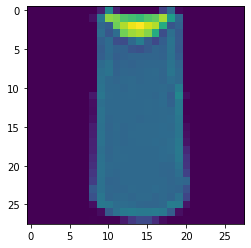

In [128]:
plt.imshow(X_train[2])

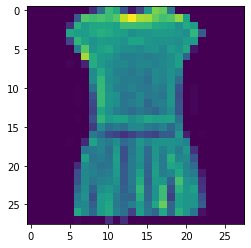

In [102]:
plt.imshow(X_train[3])

In [129]:
# this will want a stack
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)


# adding a dummy dimension - X_train has 60k records, X_test has 10k records - wants 4d, so we add a dummy variable


In [133]:
clothes_model= Sequential()
# before you pool, convolute
clothes_model.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'))
clothes_model.add(MaxPool2D(pool_size=(2,2), strides=2))
clothes_model.add(Flatten())
clothes_model.add(Dense(100, activation='relu'))
clothes_model.add(Dense(10, activation='softmax'))

# always pair a convulition with a pool. you don't have to pool, but if you do, you must convolute 
# max pooling is making yor pixels easier to process, but fuzzier, so adding some helps but adding too many
# may make your model underperform. but there are some complex networks that do a lot of pool and convolve. 
                  
# the orders matters
# 1- extract features- convule and pool
# flatten results
# then feed into regular networks 
# dense vs simple - dense layer is conventional nodes so dense 10 is literally 10 nodes, 
# they take a weight, apply input, apply activation  and spit it out
# the rnn is looping the input back- different layers do different things to the inputs

In [131]:
clothes_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

In [132]:
history = clothes_model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), 
                         epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4199 - accuracy: 0.8517 - val_loss: 0.3411 - val_accuracy: 0.8731
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2829 - accuracy: 0.8984 - val_loss: 0.3024 - val_accuracy: 0.8899
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2452 - accuracy: 0.9136 - val_loss: 0.2818 - val_accuracy: 0.8997
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2205 - accuracy: 0.9217 - val_loss: 0.2891 - val_accuracy: 0.9024
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2019 - accuracy: 0.9285 - val_loss: 0.2642 - val_accuracy: 0.9111
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1881 - accuracy: 0.9329 - val_loss: 0.2905 - val_accuracy: 0.9043
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1743 - accuracy: 0.9380 - val_loss: 0.2804 - val_ac

In [134]:
# this returns probabilities, we want the largest probability
clothes_model.predict(X_test)

array([[0.12220539, 0.10496735, 0.12004807, ..., 0.0853795 , 0.09539548,
        0.09396213],
       [0.13744475, 0.09277359, 0.13434488, ..., 0.08686038, 0.11243457,
        0.08625427],
       [0.14767523, 0.09684661, 0.13850632, ..., 0.08170602, 0.07795356,
        0.0837711 ],
       ...,
       [0.11438151, 0.09871989, 0.12787862, ..., 0.08403251, 0.09785525,
        0.093922  ],
       [0.1188432 , 0.11349972, 0.14227684, ..., 0.08472196, 0.09797645,
        0.09050027],
       [0.11631091, 0.10328552, 0.11341011, ..., 0.09273692, 0.09928821,
        0.09447005]], dtype=float32)

In [139]:
# when you make pred, you get an array, bc of the softmax function
# the idea is whatever the highest probability is is the category, which corresponds with an item. 
y_test_preds = np.argmax(clothes_model.predict(X_test), axis=1)

In [141]:
# this is an example of a row- each number is a probabiliy of corresponding to a category. 
# so first numbers is 1, then 2, then 3 etc
# these represent clothes
# whatever has the highest probability per record ends up being the category

clothes_model.predict(X_test)[0]

array([0.12220539, 0.10496735, 0.12004807, 0.08978476, 0.0804783 ,
       0.09056218, 0.11721689, 0.0853795 , 0.09539548, 0.09396213],
      dtype=float32)

In [140]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [138]:
y_test == y_test_preds

array([False, False, False, ..., False, False,  True])

In [ ]:
# the numbers are representing a classification of clothing 


AttributeError: 'AxesImage' object has no attribute 'reshape'

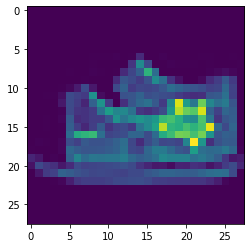

In [143]:
plt.imshow(X_test[-1]).reshape(28,28)